
# 6. Log

## 原理解释
对数（log）变换主要用于扩展图像的暗部细节。基本的数学原理很简单，如果有一个像素值为 $r$，其对数变换后的值 $s$ 由以下公式确定：

$$
s=c\log(1+r)
$$

其中，$c$ 是常数，用来调节输出的范围，通常可以基于需要的输出像素范围来选择。


解释
- 目的：对数变换将较低的像素值映射到更广泛的输出范围，而将较高的像素值压缩到较小的输出范围。这意味着在图像的暗部（低像素值）会有更多的对比度和细节。
- 对数函数的性质：对数函数在其值较小（接近0）时增长得很快，但随着其值的增加，增长速度会逐渐减慢。这意味着对于暗的像素值，对数变换会有一个较大的增长，但随着像素值的增加，增长率会减小。
- 应用场景：对数变换尤其适用于图像具有过暗和过亮区域的情况。例如，当在一个大范围的亮度下拍摄一张照片时（如背光的情况），对数变换可以帮助增强图像中的暗部细节。
- $1$ 的添加：在公式中，我们向像素值 $r$ 添加了 $1$，这是为了防止当 $r=0$ 时对数值变得无穷大。这确保了所有的输入像素值都会有一个有效的输出值。

实际应用中，可能需要对整个图像或特定区域进行对数变换，以达到增强的效果。此外，常数 $c$ 的选择也会影响增强的效果，因此可能需要进行一些实验来确定最佳值。

<img src="assets/log.png" width="800"/>

## 代码实现

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..5.5451775].


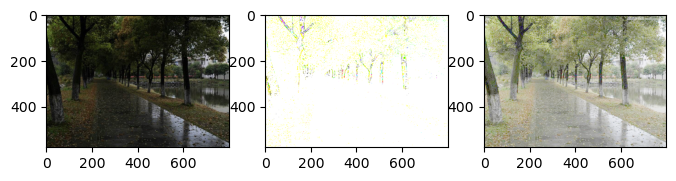

In [5]:
# 彩色直方图均衡化
import cv2
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 8))

img = cv2.imread("./images2/dark1.jpg")
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# 将图像数据转换为浮点数以进行计算
(b, g, r) = [np.float32(i) for i in cv2.split(img)]
# 对数变换
b_log = cv2.log(1 + b)
g_log = cv2.log(1 + g)
r_log = cv2.log(1 + r)
# 合并每一个通道
log_image = cv2.merge((r_log, g_log, b_log))
plt.subplot(1, 3, 2)
plt.imshow(log_image)
# 缩放到[0, 255]范围内
scaled_log_image = cv2.normalize(log_image, None, 0, 255, cv2.NORM_MINMAX)
scaled_log_image = np.uint8(scaled_log_image)  # 转回8位无符号整数
plt.subplot(1, 3, 3)
plt.imshow(scaled_log_image)
plt.show()

这个警告信息是由matplotlib库的`imshow()`函数产生的，当你试图显示RGB图像数据时。它表示你的图像数据超出了`imshow()`函数对于RGB数据的有效范围。具体来说，对于RGB图像数据：

- 如果数据类型是浮点数（例如 `float32` 或 `float64`），像素值必须在 [0, 1] 的范围内。
- 如果数据类型是整数（例如 `uint8`），像素值必须在 [0, 255] 的范围内。

超出这些范围的值将被“裁剪”或“限制”在有效范围内，这可能会导致显示的图像颜色失真。

**如何解决**：

1. **确保数据类型和值的范围匹配**:
   - 如果你的图像数据是浮点数，确保其值在 [0, 1] 范围内。
   - 如果你的图像数据是整数，确保其值在 [0, 255] 范围内。

2. **转换数据类型**:
   如果你有一个浮点数类型的图像，其值范围是 [0, 255]，你可以将其转换为 [0, 1] 范围：
   ```python
   image = image / 255.0
   ```

3. **使用clip函数**:
   你可以使用NumPy的`clip()`函数确保所有的像素值都在有效范围内：
   ```python
   import numpy as np
   image = np.clip(image, 0, 255)
   ```

之后，使用`imshow()`函数显示图像时就不会再收到此警告信息。但是如果使用`np.clip()`，超出最大值的部分会变成最大值，小于最小值的部分会变成最小值。


# 7. Power

## 原理解释

Gamma变换是对输入图像灰度值进行的非线性操作，使输出图像灰度值与输入图像灰度值呈指数关系：
$$
V_{\rm out}=AV_{\rm in}^{\gamma}
$$
目的：Gamma变换就是用来图像增强，其提升了暗部细节，通过非线性变换，让图像从暴光强度的线性响应变得更接近人眼感受的响应，即将漂白（相机曝光）或过暗（曝光不足）的图片，进行矫正。

gamma 大于 1，图片会更亮，反之变暗

<img src="images/gamma.png" width="800"/>




考虑一下这个式子
$$
\text{power} \approx \text{log} + \text{inverse log}
$$

## 代码实现

### 方法一 `np.power`

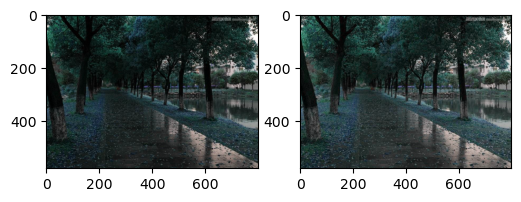

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./images2/dark1.jpg')


def adjust_gamma(image, gamma=1.0):
    return (np.power(image / 255, gamma) * 255).astype("uint8")


img_gamma = adjust_gamma(img, 0.8)

plt.figure(figsize=(6, 6))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(img_gamma)
plt.show()

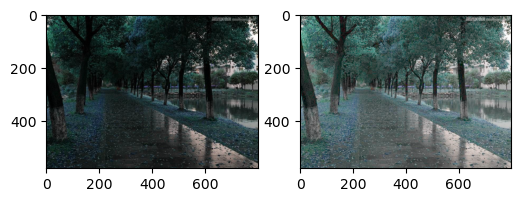

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./images2/dark1.jpg')


def adjust_gamma(image, gamma=1.0):
    invGamma = 1.0 / gamma
    table = []
    for i in range(256):
        table.append(((i / 255.0) ** invGamma) * 255)
    table = np.array(table).astype("uint8")
    return cv2.LUT(image, table)


img_gamma = adjust_gamma(img, 2)

plt.figure(figsize=(6, 6))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(img_gamma)
plt.show()

`cv2.LUT()` 是 OpenCV 中的一个函数，用于对输入图像的每个像素值进行查找表（Look-Up Table，LUT）转换。这是一个简单但非常强大的工具，经常用于实现各种图像增强或调整操作。

函数的原型：
```python
dst = cv2.LUT(src, lut)
```

参数解释：
- **src** (`src` 在这里被称为 `image`): 输入图像。
- **lut** (`lut` 在这里被称为 `table`): 查找表，一个数组，其中索引表示输入像素值，索引位置的值表示输出像素值。

返回值：
- **dst**: 转换后的图像。

查找表（LUT）本质上是一个数组，它定义了如何映射输入像素值到输出像素值。例如，如果我们有一个简单的8位图像（像素值在0到255之间），我们的LUT可能也是一个256元素的数组。LUT中索引为0的值是输入像素值0应该被映射到的值，索引为1的值是输入像素值1应该被映射到的值，依此类推。

这个方法的一个常见用途是进行非线性对比度增强。例如，我们可以使用一个S型曲线的LUT来增强图像的对比度。

**示例**:
假设我们想要将所有像素值小于128的像素都映射为0，而大于或等于128的像素值都映射为255（这是一个简化的二值化效果），我们可以使用以下查找表：

```python
import numpy as np
import cv2

# 创建查找表
lut = np.zeros(256, dtype=np.uint8)
lut[128:] = 255

# 读取图像
image = cv2.imread('path_to_image.jpg', cv2.IMREAD_GRAYSCALE)

# 使用 LUT 进行转换
binary_image = cv2.LUT(image, lut)

# 显示结果
cv2.imshow('Original', image)
cv2.imshow('Binary', binary_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
```

这个简单的LUT转换了输入图像，使其具有更高的对比度。在实际应用中，LUT 可以更加复杂，并用于实现各种图像处理效果。